In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from pyfonts import load_font

In [2]:
monsters = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-27/monsters.csv")

In [3]:
monsters.head(3)

,name,category,cr,size,type,descriptive_tags,alignment,ac,initiative,hp,...,wis_save,cha_save,skills,resistances,vulnerabilities,immunities,gear,senses,languages,full_text
0,Aboleth,Aboleth,10.0,Large,Aberration,NaN,Lawful Evil,17,7,150 (20d10 + 40),...,6,4,"History +12, Perception +10",NaN,NaN,NaN,NaN,Darkvision 120 ft.; Passive Perception 20,Deep Speech; telepathy 120 ft.,"Aboleth\nLarge Aberration, Lawful Evil\nAC 17\..."
1,Air Elemental,Air Elemental,5.0,Large,Elemental,NaN,Neutral,15,5,90 (12d10 + 24),...,0,-2,NaN,"Bludgeoning, Lightning, Piercing, Slashing",NaN,"Poison, Thunder; Exhaustion, Grappled, Paralyz...",NaN,Darkvision 60 ft.; Passive Perception 10,Primordial (Auran),"Air Elemental\nLarge Elemental, Neutral\nAC 15..."
2,Animated Armor,Animated Objects,1.0,Medium,Construct,NaN,Unaligned,18,2,33 (6d8 + 6),...,-4,-5,NaN,NaN,NaN,"Poison, Psychic; Charmed, Deafened, Exhaustion...",NaN,Blindsight 60 ft.; Passive Perception 6,NaN,"Animated Armor\nMedium Construct, Unaligned\nA..."


In [4]:
monsters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               330 non-null    object 
 1   category           330 non-null    object 
 2   cr                 330 non-null    float64
 3   size               330 non-null    object 
 4   type               330 non-null    object 
 5   descriptive_tags   91 non-null     object 
 6   alignment          330 non-null    object 
 7   ac                 330 non-null    int64  
 8   initiative         330 non-null    int64  
 9   hp                 330 non-null    object 
 10  hp_number          330 non-null    int64  
 11  speed              330 non-null    object 
 12  speed_base_number  330 non-null    int64  
 13  str                330 non-null    int64  
 14  dex                330 non-null    int64  
 15  con                330 non-null    int64  
 16  int                330 non

In [5]:
df = monsters[["name", "alignment", "int", "cha", "hp_number"]]

In [6]:
df.head(3)

,name,alignment,int,cha,hp_number
0,Aboleth,Lawful Evil,18,18,150
1,Air Elemental,Neutral,6,6,90
2,Animated Armor,Unaligned,1,1,33


In [7]:
df.isna().sum()

name         0
alignment    0
int          0
cha          0
hp_number    0
dtype: int64

In [8]:
font_path = 'DnDC.ttf'
dd = FontProperties(fname=font_path)

metamorphous = load_font(
    font_url="https://github.com/google/fonts/blob/main/ofl/metamorphous/Metamorphous-Regular.ttf?raw=true"
)

montserrat = load_font(
    font_url="https://github.com/luisangelmaciel/font-family-montserrat/blob/master/fonts/ttf/Montserrat-Regular.ttf?raw=true"
)

In [9]:
cats = df["alignment"].unique()

In [10]:
min_s = 5
max_s = 50
s = df["hp_number"]
s_scaled = min_s + (s - s.min()) * (max_s - min_s) / (s.max() - s.min())

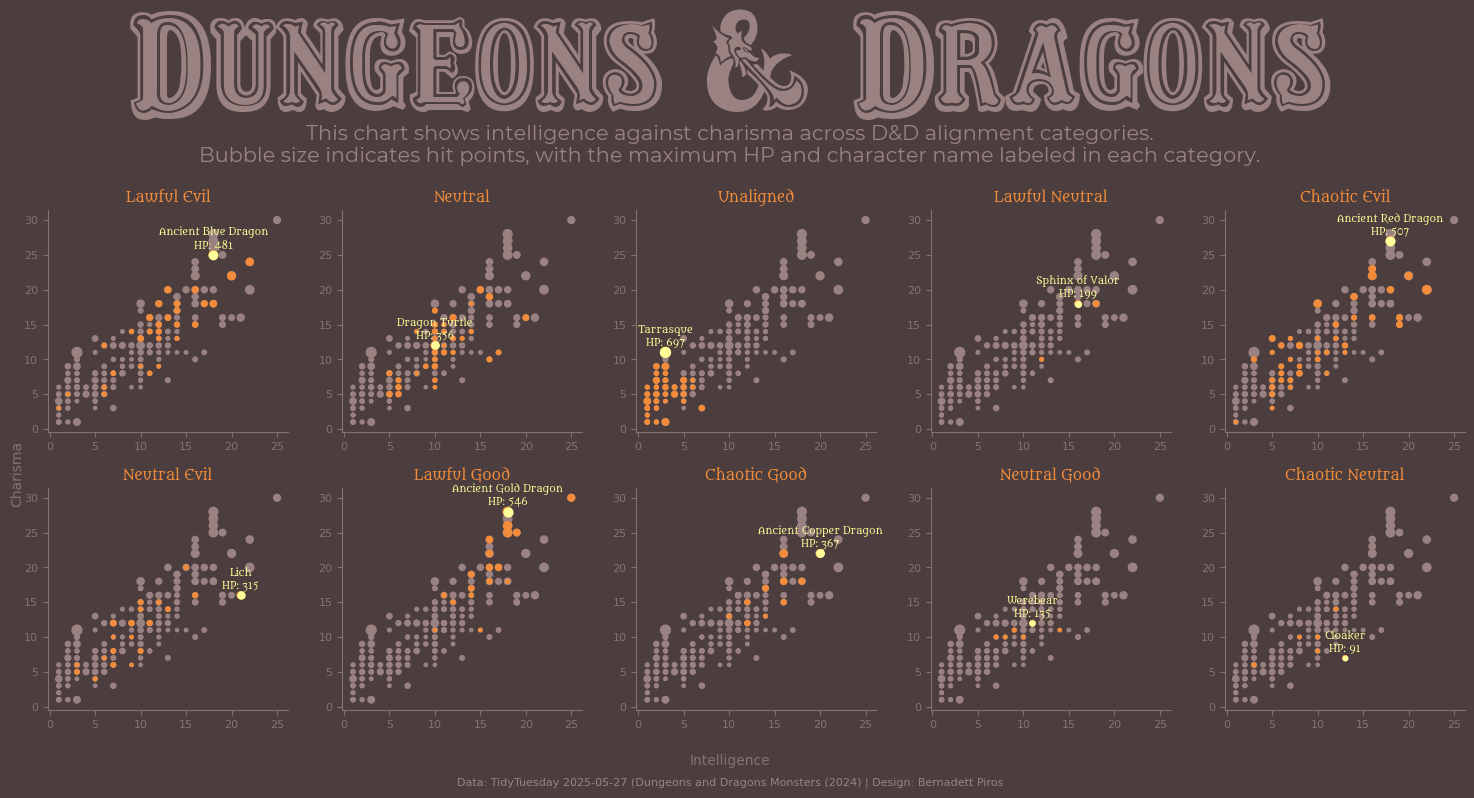

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axs = axs.flatten()

for i, cat in enumerate(cats):
    ax = axs[i]

    mask = df["alignment"] == cat
    df_subset = df[mask]
    s_subset = s_scaled[mask]
    
    ax.scatter(df["int"], df["cha"], s=s_scaled, color="#9b8282")
    ax.scatter(df_subset["int"], df_subset["cha"], s=s_subset, color="#f28c3a")

    for col in ["hp_number"]:
        max_idx = df_subset[col].idxmax()
        max_row = df.loc[max_idx]        
        ax.scatter(max_row["int"], max_row["cha"], s=s_scaled[max_idx], color="#ffff99", zorder=3)
        ax.text(
            max_row["int"],
            max_row["cha"]+0.5,            
            f'{max_row["name"]}\nHP: {max_row["hp_number"]}',  
            font=metamorphous,
            fontsize=7,            
            color="#ffff99",
            ha="center",
            va="bottom"
        )

        ax.set_title(f"{cat}", color="#f28c3a", font=metamorphous)

    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["left", "bottom"]].set_color("#857373")
    ax.tick_params(labelsize=8, labelcolor="#857373", colors="#857373")

    ax.set_facecolor("#4c3e3e")

fig.set_facecolor("#4c3e3e")

fig.supxlabel("Intelligence", fontsize=10, color="#857373")
fig.supylabel("Charisma", fontsize=10, color="#857373")

fig.text(0.5, 1.102, "Dungeons & Dragons", font=dd, color="#9b8282", size=130, ha="center")

fig.text(0.5, 1.02, "This chart shows intelligence against charisma across D&D alignment categories.\nBubble size indicates hit points, with the maximum HP and character name labeled in each category.",
         font=montserrat, size=15, color="#9b8282", ha="center")

fig.text(0.5, -0.02, "Data: TidyTuesday 2025-05-27 (Dungeons and Dragons Monsters (2024) | Design: Bernadett Piros",
         color="#9b8282", size=8, ha="center")

plt.tight_layout()

plt.show()

#fig.savefig("2025-05-27.png", bbox_inches='tight', pad_inches=0.2)
